# Ada boost classifier

## Step 1 : Include all required libraries.

In [ ]:
from typing import Optional
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs

## Step 2 : Defining the Adaboost class. And algorithm as:
    input:
      training set S = (x1, y1), . . . ,(xm, ym)
      weak learner WL
      number of rounds T
    initialize D(1) = ( 1/m , . . . ,1/m ).
    for t = 1, . . . , T:
      invoke weak learner ht = WL(D(t), S)
      compute et=sum_i_m(Di(t)*1[yi!=ht(xi)])
      let wt =1/2*log(1-et/et)
      update D(t+1)i = D(t)i*exp(−wt*yi*ht(xi))/sum j=1 to m  D(t)j*exp(−wt*yj*ht(xj ))for all i = 1, . . . , m
    output the hypothesis hs(x) = sign(sum t=1 to T wt*ht(x)).

In [ ]:
class AdaBoost_classifier:
    # Defining the initial values of the variables
    def __init__(self):
        self.stumps = None
        self.stump_weights = None
        self.errors = None
        self.sample_weights = None

    # checking the values of y label as +1 and -1 
    def check_X_y(self, X, y):
        assert set(y) == {-1, 1} 
        return X, y

    # Fitting the model using decision stumps.
    def fit_model(self, X , y , iterations , iteration_information):
        X, y = self.check_X_y(X, y)
        n = X.shape[0]

        # initialise numpy arrays
        self.sample_weights = np.zeros(shape=(iterations, n))
        self.stumps = np.zeros(shape=iterations, dtype=object)
        self.stump_weights = np.zeros(shape=iterations)
        self.errors = np.zeros(shape=iterations)

        # initialize weights uniformly
        self.sample_weights[0] = np.ones(shape=n) / n

        for t in range(iterations):

            # fit  weak learner use decision tree classifier with depth 1 and leaves as 2 to create a decision stump
            curr_sample_weights = self.sample_weights[t]
            stump = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
            stump = stump.fit(X, y, sample_weight=curr_sample_weights)

            # calculate error and stump weight from weak learner prediction error = 1/2*log(1/e-1)
            stump_pred = stump.predict(X)
            err = curr_sample_weights[(stump_pred != y)].sum()
            stump_weight = np.log((1 - err) / err) / 2

            # update sample weights by usng the formula D*e(-W*y*h(x))
            new_sample_weights = (
                curr_sample_weights * np.exp(-stump_weight * y * stump_pred)
            )            
            new_sample_weights /= new_sample_weights.sum()

            if iteration_information == True:
              print("Error for iteration ",t," is ",err,'\n')
              print("Stump Weight for iteration ",t," is ",stump_weight,'\n')
              print("New Stump Weight for iteration ",t," is ",new_sample_weights,'\n')
            # If not final iteration, update sample weights for t+1
            if t+1 < iterations:
                self.sample_weights[t+1] = new_sample_weights

            # save results of iteration
            self.stumps[t] = stump
            self.stump_weights[t] = stump_weight
            self.errors[t] = err
        return self

    def predict(self, X):
        stump_preds = np.array([stump.predict(X) for stump in self.stumps])
        return np.sign(np.dot(self.stump_weights, stump_preds))

## Step 3 : Defining the functions used for visualizing the classifier.

In [ ]:
# Defining the function to plot the decision boundary of adaboost classifier
def plot_adaboost(X,y,clf=None,sample_weights=None):
    # checking for target to be 1 and -1 
    assert set(y) == {-1, 1}
    # Defining the figure size and the dpi
    fig, ax = plt.subplots(figsize=(7, 7), dpi=100)
    # background color set as white 
    fig.set_facecolor('white')
    # defining the boundary padding of the data points
    pad = 1
    x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad
    
    # If sample weights are not given then assigning sizes using shape
    if sample_weights is not None:
        sizes = np.array(sample_weights) * X.shape[0] * 100
    else:
        sizes = np.ones(shape=X.shape[0]) * 100
    
    # Potting the positive that is 1 data points using scatter plot using color blue
    X_pos = X[y == 1]
    sizes_pos = sizes[y == 1]
    ax.scatter(*X_pos.T, s=sizes_pos, marker='+', color='blue')
    
    # Potting the negative that is -1 data points using scatter plot using color red
    X_neg = X[y == -1]
    sizes_neg = sizes[y == -1]
    ax.scatter(*X_neg.T, s=sizes_neg, marker='.', c='red')

    # if classifier is not provided then no decision boundary is drawn
    if clf:
        plot_step = 0.01
        # using meshgrid to draw the decision boundary of adaboost classifier
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        # If all predictions are positive class, adjust color map acordingly
        if list(np.unique(Z)) == [1]:
            fill_colors = ['b']
        else:
            fill_colors = ['r', 'b']
        ax.contourf(xx, yy, Z, colors=fill_colors, alpha=0.2)
    
    ax.set_xlim(x_min+0.5, x_max-0.5)
    ax.set_ylim(y_min+0.5, y_max-0.5)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

## Step 4 : Defining the Function to create a random 2d dataset, and creating Training and test set. 

In [ ]:
def make_2D_gaussian_dataset( n , random_seed):
    n_per_class = int(n/3)
    if random_seed:
        np.random.seed(random_seed)
    X, y = make_gaussian_quantiles(n_samples=n, n_features=2, n_classes=2)
    return X, y*2-1

## Step 5 : Creating the 2d Data set.

Total Data points : 1000
Total Data points in traing set : 700
Total Data points in test set : 300


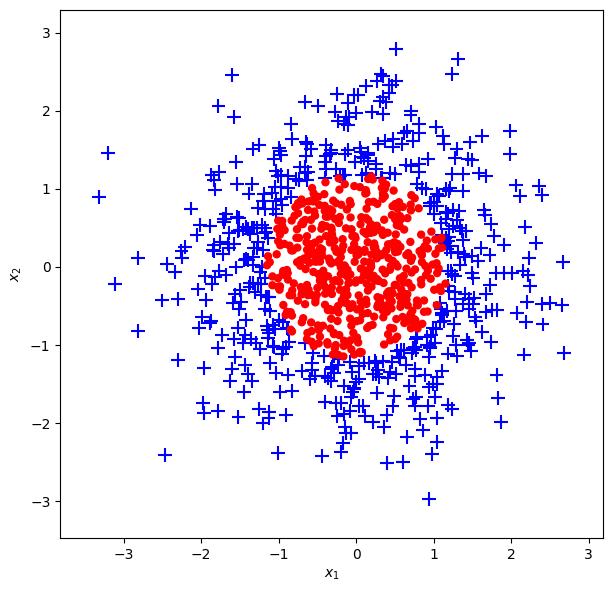

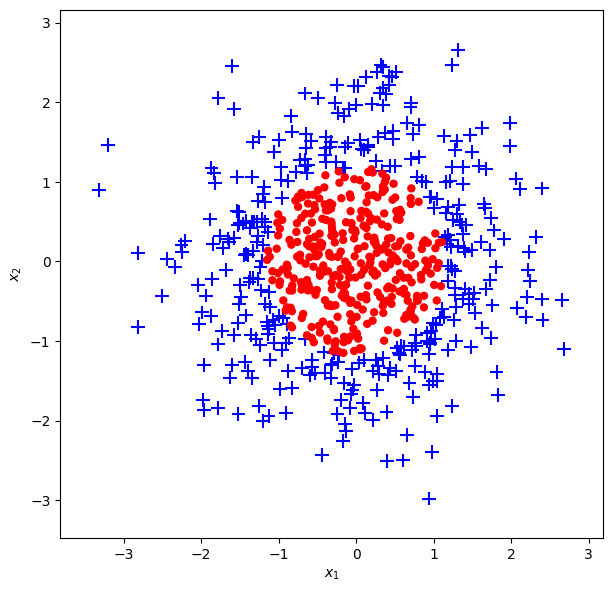

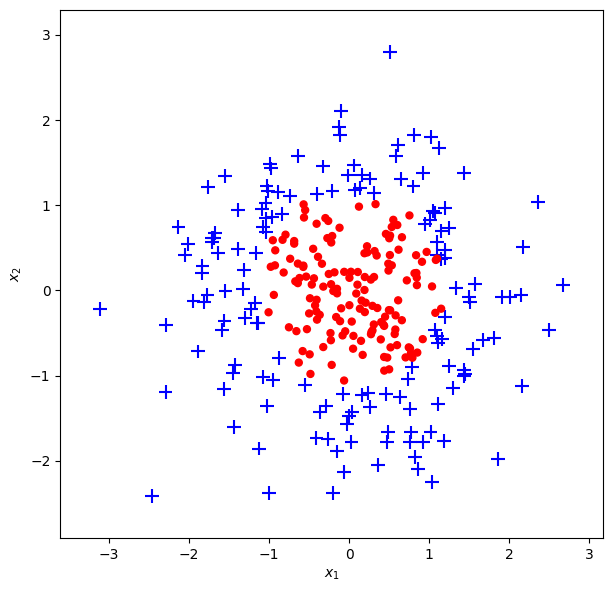

In [ ]:
# defining n the number of total data points.
n = 1000
X, y = make_2D_gaussian_dataset(n, random_seed=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("Total Data points :",n)
plot_adaboost(X, y)
print("Total Data points in traing set :",X_train.shape[0])
plot_adaboost(X_train, y_train)
print("Total Data points in test set :",X_test.shape[0])
plot_adaboost(X_test, y_test)

## Step 6 : Creating classifier and fitting the classifier.  

In [ ]:
# defining the number of iteations as i
i = 10
clf = AdaBoost_classifier().fit_model(X_train, y_train, iterations=i,iteration_information=True)
print("Final updated values of weights for ",i," Decision stumps are:")
print(clf.stump_weights)

Error for iteration  0  is  0.3642857142857143 

Stump Weight for iteration  0  is  0.27840536850390696 

New Stump Weight for iteration  0  is  [0.0011236  0.0011236  0.00196078 0.0011236  0.0011236  0.0011236
 0.00196078 0.00196078 0.0011236  0.0011236  0.0011236  0.0011236
 0.0011236  0.0011236  0.0011236  0.0011236  0.00196078 0.0011236
 0.00196078 0.0011236  0.0011236  0.00196078 0.00196078 0.00196078
 0.00196078 0.00196078 0.00196078 0.00196078 0.0011236  0.0011236
 0.0011236  0.0011236  0.0011236  0.0011236  0.0011236  0.00196078
 0.0011236  0.0011236  0.0011236  0.0011236  0.0011236  0.0011236
 0.0011236  0.0011236  0.0011236  0.0011236  0.00196078 0.0011236
 0.0011236  0.0011236  0.00196078 0.0011236  0.0011236  0.00196078
 0.00196078 0.00196078 0.0011236  0.0011236  0.0011236  0.0011236
 0.0011236  0.0011236  0.00196078 0.00196078 0.0011236  0.0011236
 0.0011236  0.00196078 0.0011236  0.0011236  0.0011236  0.00196078
 0.0011236  0.00196078 0.0011236  0.0011236  0.0011236  0.0

## Step 7 : plotting the classifier output and checking for error.

Train error: 5.714285714285714
Test error: 7.333333333333333


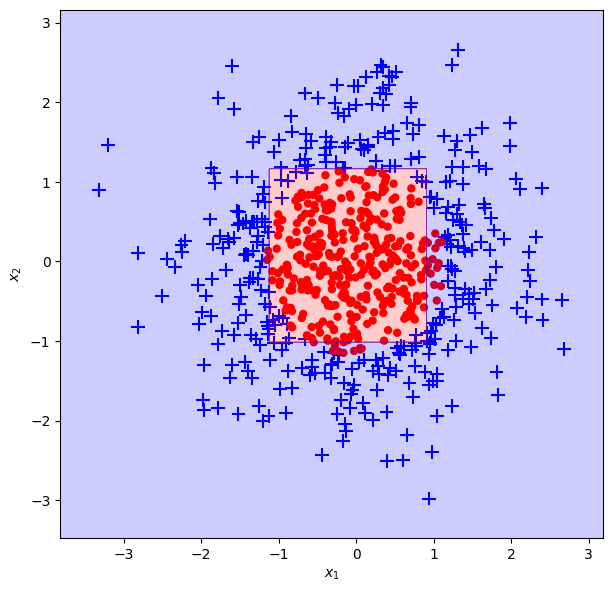

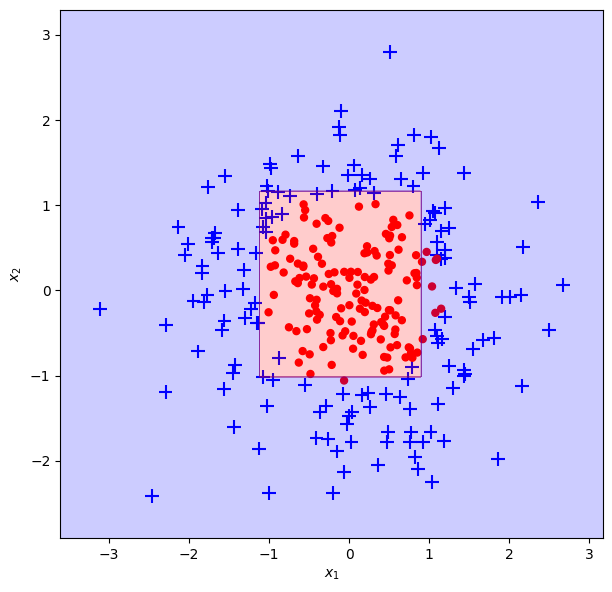

In [ ]:
plot_adaboost(X_train, y_train, clf)
train_err = (clf.predict(X_train) != y_train).mean() * 100
print('Train error:',train_err)
plot_adaboost(X_test, y_test, clf)
test_err = (clf.predict(X_test) != y_test).mean() * 100
print('Test error:',test_err)

# Step 8 : Using the Adaboost provided in sklearn to check for accuracy of defined model.

Train error: 5.714285714285714
Test error: 7.333333333333333


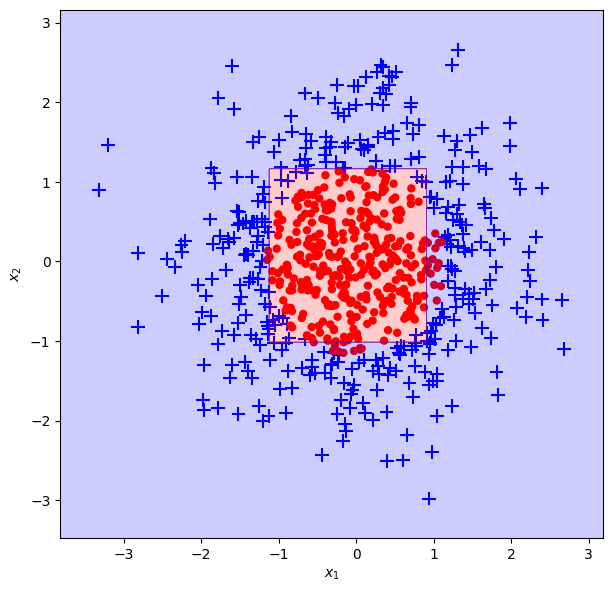

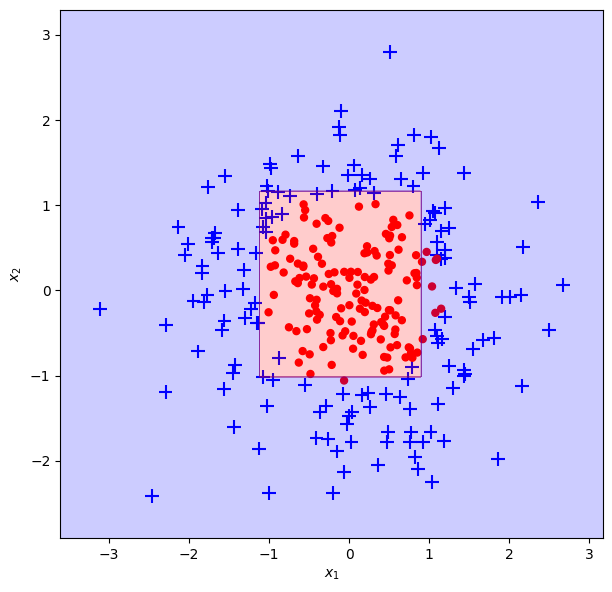

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
benchmark = AdaBoostClassifier(n_estimators=i, algorithm='SAMME').fit(X_train, y_train)
plot_adaboost(X_train, y_train, benchmark)
train_err = (benchmark.predict(X_train) != y_train).mean()*100
print('Train error:',train_err)
plot_adaboost(X_test, y_test, benchmark)
test_err = (benchmark.predict(X_test) != y_test).mean() * 100
print('Test error:',test_err)

## Step 9 : Comparing different values of iterations that is weak classifiers used for adaboost.

In [ ]:
# defining the minimum numbers of iterations or weak classifier used for getting the minimum train error and test error
min_train = 0
min_test = 0

In [ ]:
s1 = []
i=1
previous_test_err = 100.0
while i<n/2:
  clf = AdaBoost_classifier().fit_model(X_train, y_train, iterations=i,iteration_information=False)
  #plot_adaboost(X_train, y_train, clf)
  #train_err = (clf.predict(X_train) != y_train).mean() * 100
  #print('Train error:',train_err)
  #plot_adaboost(X_test, y_test, clf)
  test_err = (clf.predict(X_test) != y_test).mean() * 100
  print('Test error:',test_err)
  s1.append(test_err)
  i = i + 1
print("For test set")
print("Minimum error is ",min(s1))
print("Number of ierations to reach minimum error is ",s1.index(min(s1))+1) 
min_train = s1.index(min(s1))+1

Test error: 37.666666666666664
Test error: 37.666666666666664
Test error: 27.333333333333332
Test error: 27.333333333333332
Test error: 19.333333333333332
Test error: 19.333333333333332
Test error: 8.0
Test error: 8.0
Test error: 25.666666666666664
Test error: 7.333333333333333
Test error: 25.0
Test error: 6.0
Test error: 17.333333333333336
Test error: 6.0
Test error: 8.333333333333332
Test error: 7.000000000000001
Test error: 8.333333333333332
Test error: 7.666666666666666
Test error: 8.333333333333332
Test error: 8.333333333333332
Test error: 8.333333333333332
Test error: 8.0
Test error: 7.666666666666666
Test error: 7.666666666666666
Test error: 7.666666666666666
Test error: 7.666666666666666
Test error: 7.666666666666666
Test error: 8.0
Test error: 7.666666666666666
Test error: 8.0
Test error: 7.666666666666666
Test error: 7.666666666666666
Test error: 7.666666666666666
Test error: 7.666666666666666
Test error: 7.333333333333333
Test error: 7.333333333333333
Test error: 7.333333333

In [ ]:
s1 = []
i=1
previous_train_err = 100.0
while i<n/2:
  clf = AdaBoost_classifier().fit_model(X_train, y_train, iterations=i,iteration_information=False)
  #plot_adaboost(X_train, y_train, clf)
  train_err = (clf.predict(X_train) != y_train).mean() * 100
  print('Train error:',train_err)
  #plot_adaboost(X_test, y_test, clf)
  #test_err = (clf.predict(X_test) != y_test).mean() * 100
  #print('Test error:',test_err)
  s1.append(train_err)
  i = i + 1
print("For train set")
print("Minimum error is ",min(s1))
print("Number of ierations to reach minimum error is ",s1.index(min(s1))+1) 
min_test = s1.index(min(s1))+1

Train error: 36.42857142857142
Train error: 36.42857142857142
Train error: 24.285714285714285
Train error: 24.285714285714285
Train error: 15.0
Train error: 15.0
Train error: 5.714285714285714
Train error: 5.714285714285714
Train error: 25.285714285714285
Train error: 5.714285714285714
Train error: 22.428571428571427
Train error: 5.714285714285714
Train error: 13.142857142857142
Train error: 6.142857142857143
Train error: 5.857142857142858
Train error: 6.142857142857143
Train error: 5.857142857142858
Train error: 5.571428571428571
Train error: 5.857142857142858
Train error: 5.857142857142858
Train error: 5.857142857142858
Train error: 5.571428571428571
Train error: 4.285714285714286
Train error: 5.285714285714286
Train error: 4.285714285714286
Train error: 5.571428571428571
Train error: 4.285714285714286
Train error: 5.571428571428571
Train error: 4.285714285714286
Train error: 5.428571428571429
Train error: 3.8571428571428568
Train error: 4.285714285714286
Train error: 3.8571428571428

For number of data points  1000
Minimum number of iterations for minimum training error is  372
Minimum number of iterations for minimum testing error is  283
The minimum number of iterations selected for n =  1000  is  372
Plotting the Adaboost classifier for above minimum iterations
Train error: 0.0
Test error: 3.3333333333333335


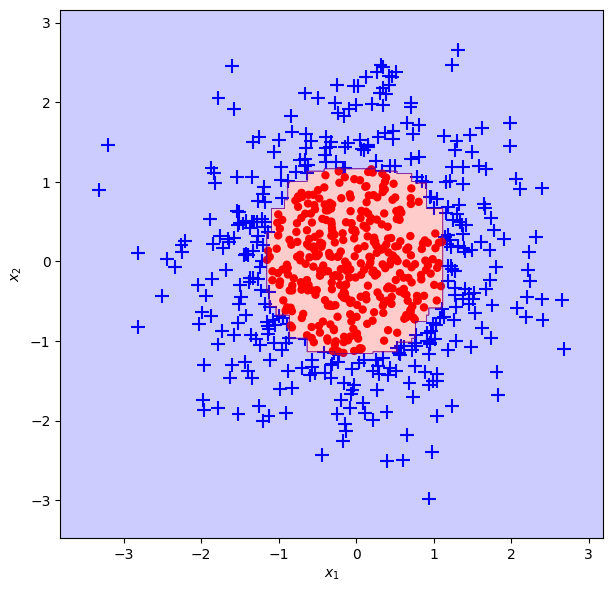

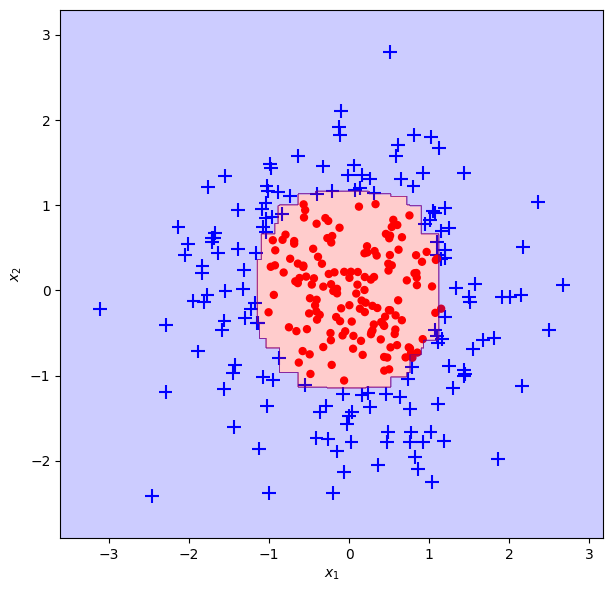

In [ ]:
print("For number of data points ",n)
print("Minimum number of iterations for minimum training error is ",min_train)
print("Minimum number of iterations for minimum testing error is ",min_test)
print("The minimum number of iterations selected for n = ",n," is ",max(min_train,min_test))
print("Plotting the Adaboost classifier for above minimum iterations")
model = AdaBoost_classifier().fit_model(X_train,y_train,iterations=max(min_train,min_test),iteration_information=False)
plot_adaboost(X_train,y_train,model)
plot_adaboost(X_test,y_test,model)
train_err = (clf.predict(X_train) != y_train).mean() * 100
print('Train error:',train_err)
test_err = (clf.predict(X_test) != y_test).mean() * 100
print('Test error:',test_err)

# In this way we can see the different number of weak classifiers are required for different number of Data points.